# Loan Application Status Prediction 




Project Description


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:\
1.Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases\
2.Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions\
3.Married - This refers to applicant being in a state of matrimony\
4.Dependents - This refres to persons who depends on the applicants for survival\
5.Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university\
6.Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer\
7.Applicant Income - This refers to disposable income available for the applicant's use under State law.\
8.CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.\
9.Loan_Amount - This refers to the amount of money an applicant owe at any given time.\
10.Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant\
11.Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.\
12.Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.\
13.Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.\
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


Dataset Link-  https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Analysis

In [4]:
df.duplicated().sum() # This check any if any duplicated entry exit in dataset 

0

### Intial observation:
- The target variable, 'Loan_Status', is a categorical variable with an object data type.
- Gender, Married, Education, Self Employed, Credit History, and Loan Status are all categorical features.

In [5]:
df.isnull().sum()/len(df)*100


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

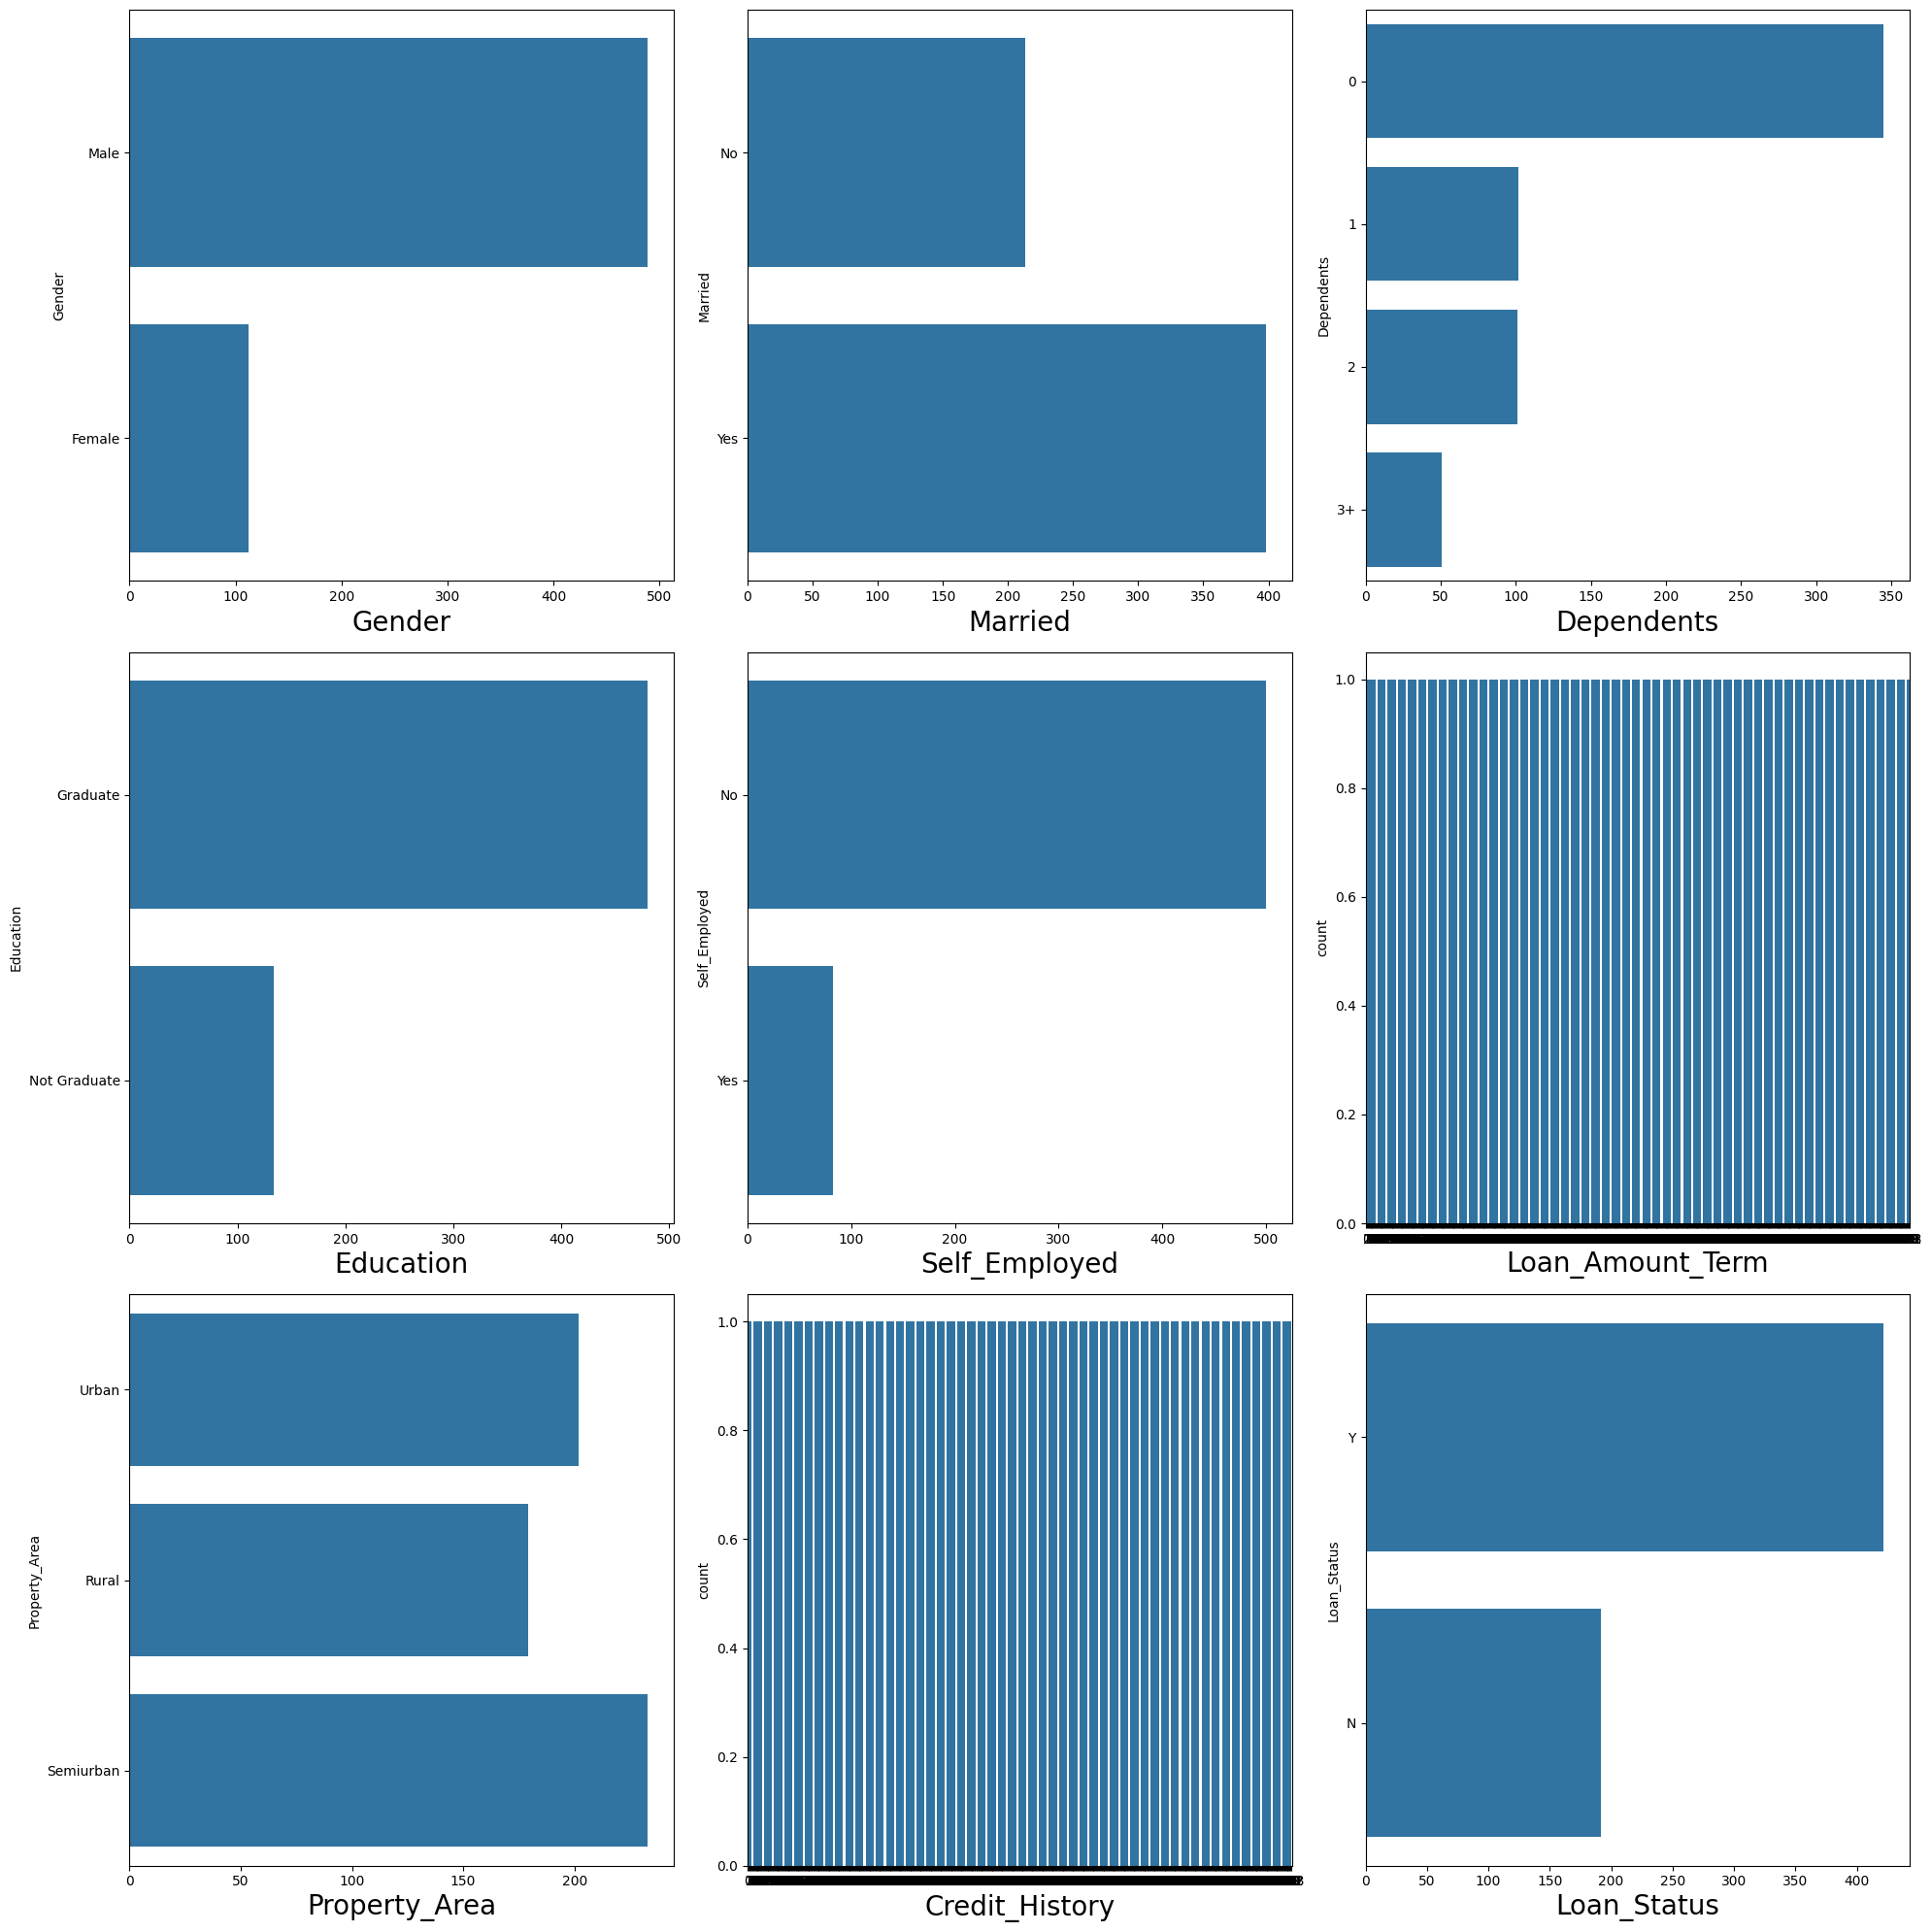

In [6]:

plt.figure(figsize=(20, 20))
plotnumber = 1
category = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
            'Loan_Amount_Term', 'Property_Area', 'Credit_History', 'Loan_Status']

for feature in category:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(df[feature])
        plt.xlabel(feature, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

- 80% male applicants. Explore loan amount by gender and evaluate gender-based loan approval.
- 20% self-employed applicants. Analyze non-self-employed income and loan approval benchmarks.
- 70% married applicants, 75% graduates, 60% with no dependents.
- Majority from semi-urban areas, followed by urban and rural areas.
- 80% with credit history, indicating higher loan approval chances.
- Nearly 70% loan approval rate.
    


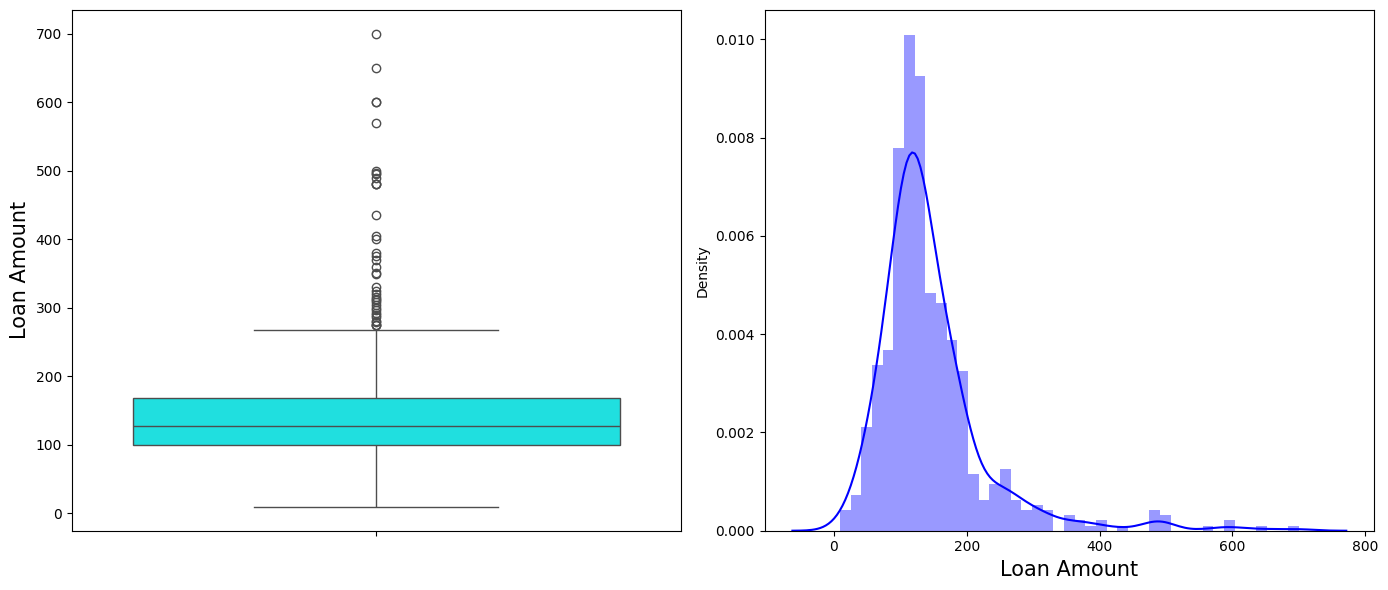

In [7]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='LoanAmount', data=df,color='cyan')
plt.ylabel('Loan Amount',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'], color='b')
plt.xlabel('Loan Amount',fontsize=15)
plt.tight_layout()
plt.show()

In [8]:
print("Mean of Loan Amount:",df['LoanAmount'].mean())
print("Median of Loan Amount:",df['LoanAmount'].median())

Mean of Loan Amount: 146.41216216216216
Median of Loan Amount: 128.0


#### Note :
- The missing values in the Loan Amount column are filled by imputing them with the median value.
- Since the maximum Loan Term is 360 months, any missing values in the Loan Amount Term column are replaced with 360 months.
- The missing values in the Credit History, Self Employed, Dependents, Gender, and Married columns are replaced with the mode (most frequent value) of their respective features.

In [9]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### Target Variable

<Axes: xlabel='count', ylabel='Loan_Status'>

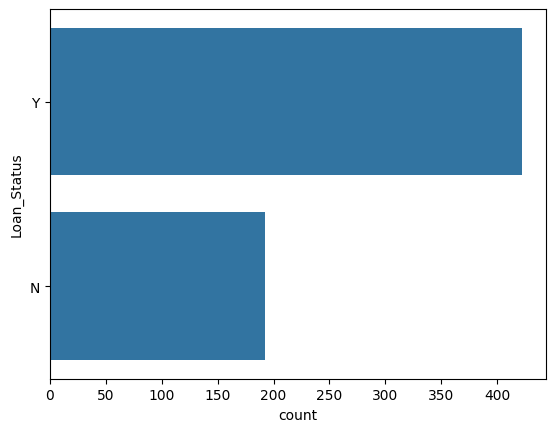

In [12]:
sns.countplot(df['Loan_Status'])


- Imbalanced Data

<Axes: xlabel='Gender', ylabel='count'>

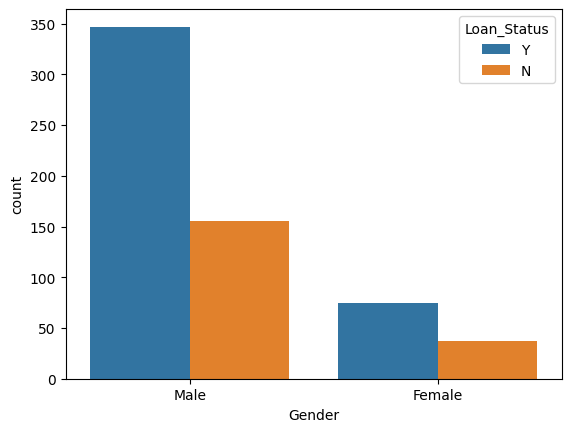

In [13]:
sns.countplot(x=df['Gender'],hue=df["Loan_Status"])

In [14]:
pd.crosstab(df['Gender'],df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


#### Note
- Gender is not that  important when looking into loan application

<Axes: xlabel='Married', ylabel='count'>

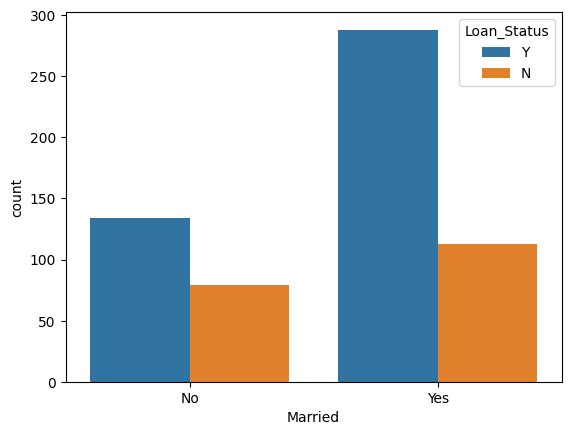

In [15]:
sns.countplot(x=df['Married'],hue=df["Loan_Status"])

In [16]:
pd.crosstab([df['Gender'],df['Married']],[df.Loan_Status],margins=True)

Loan_Status       N    Y  All
Gender Married               
Female No        29   51   80
       Yes        8   24   32
Male   No        50   83  133
       Yes      105  264  369
All             192  422  614

#### Note
-  Married man has more chances to get their loan approved


<Axes: xlabel='Education', ylabel='count'>

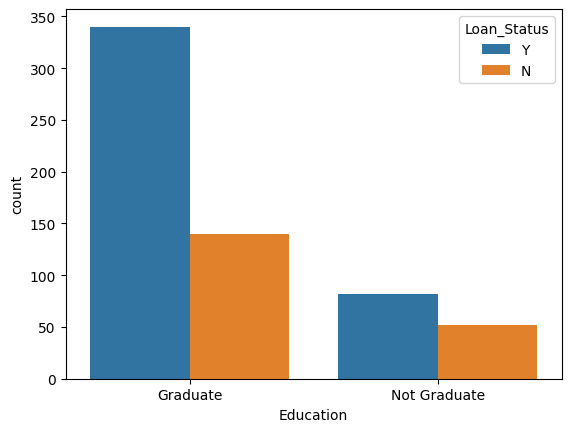

In [17]:
sns.countplot(x=df['Education'],hue=df["Loan_Status"])

#### Comment:
- Graduate applicants are more likely to get loan approval 

# Encoding categorical data

In [18]:
Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [19]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## Outliers

In [20]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

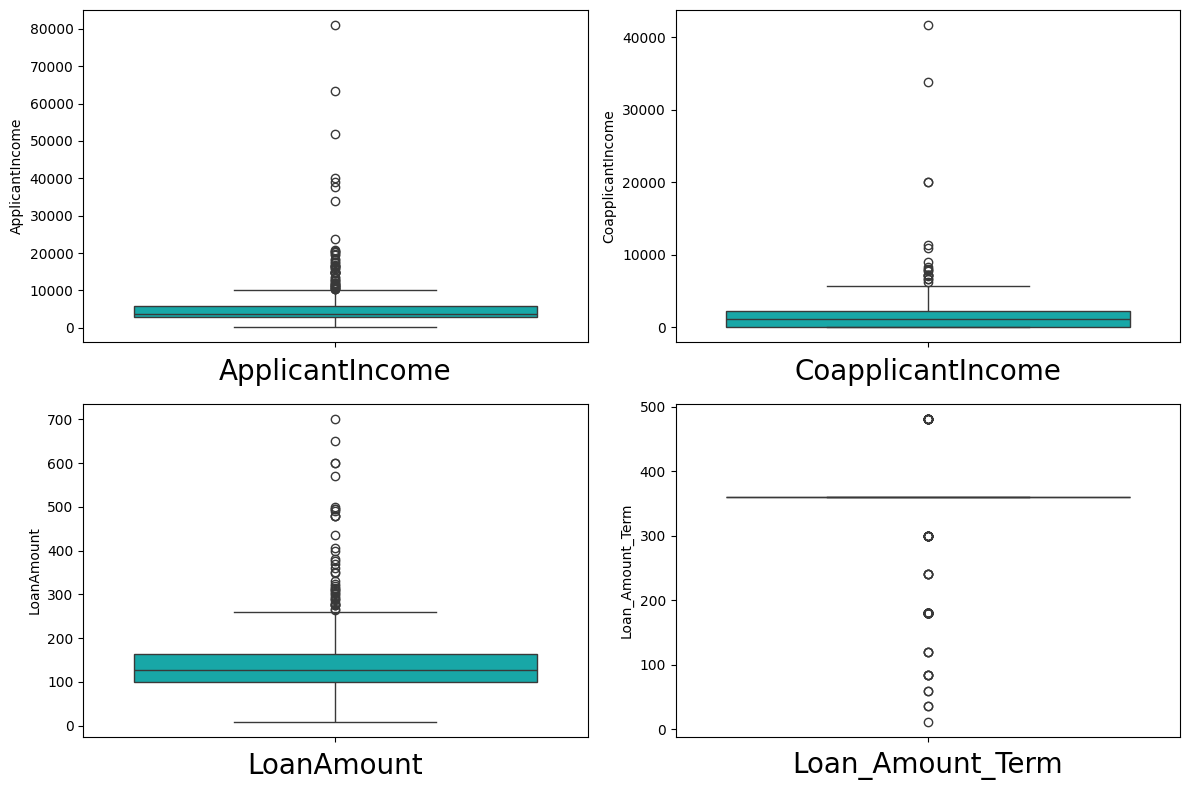

In [21]:
plt.figure(figsize=(12,8))
plotnumber=1

for column in Numerical:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [22]:
# Droping unnecessary columns
df.drop(["Loan_ID"], axis=1, inplace=True)

In [23]:
df['Dependents'] = df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})

In [24]:
df['Dependents'] =pd.to_numeric(df['Dependents'])

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() 

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


In [26]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [27]:
# yeo-johnson  method 
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [28]:
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [29]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

<Axes: >

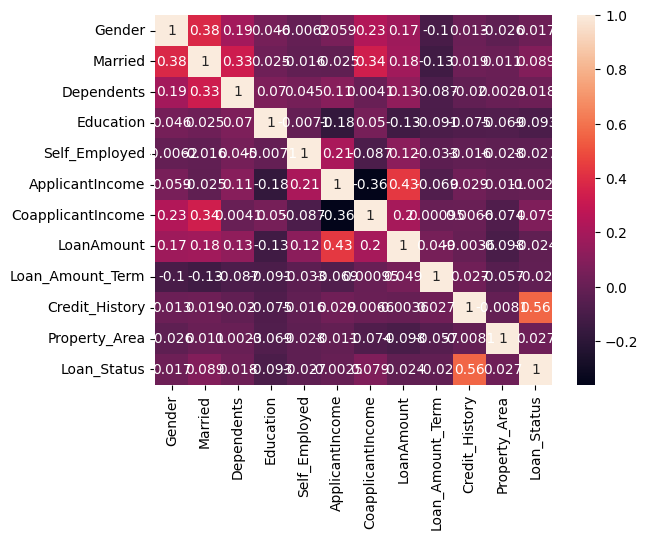

In [30]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

### VIF

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,6.119789,Gender
1,3.963538,Married
2,1.778377,Dependents
3,1.355469,Education
4,1.197219,Self_Employed
5,1.756726,ApplicantIncome
6,1.596438,CoapplicantIncome
7,1.548450,LoanAmount
8,10.415255,Loan_Amount_Term
9,9.483180,Credit_History


- Not that high multicollinearity


### Balancing dataset

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
# Splitting data in target and dependent feature
x = df.drop(['Loan_Status'], axis =1)
y = df['Loan_Status']

In [34]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [35]:
y.value_counts()

Loan_Status
1    398
0    398
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

# Machine Learning Model Building

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.2,random_state=45)
print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)


Train data shape:  (636, 11)
Test data shape:  (160, 11)


Random Forest Accuracy: 0.80625
K-Nearest Neighbors Accuracy: 0.71875
SVM Accuracy: 0.775
Decision Tree Accuracy: 0.7375
Logistic Regression Accuracy: 0.775
Naive Bayes Accuracy: 0.73125


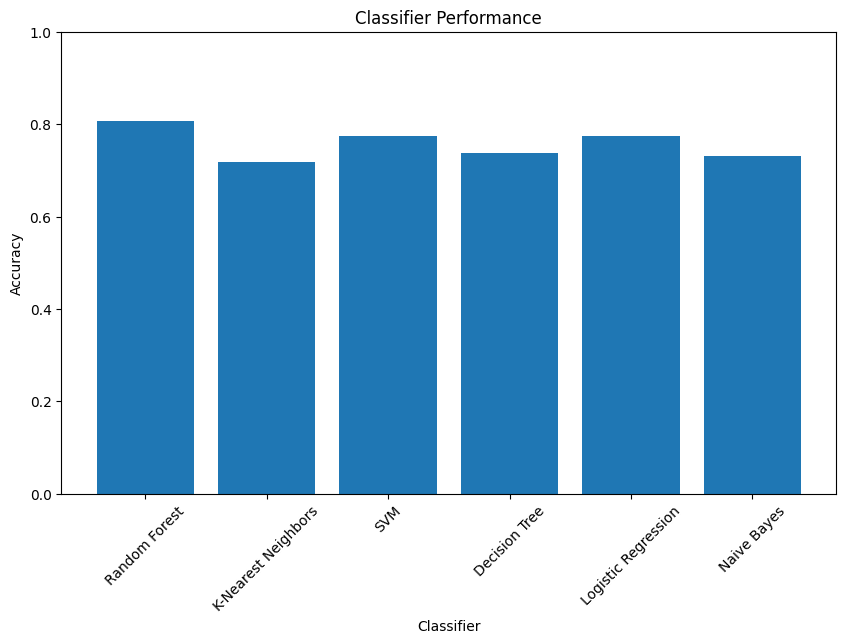

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifier_model = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB()
} 
classifier_names = []
accuracy_scores = []

for classifier in classifier_model:
    classifier_name=classifier
    model = classifier_model[classifier] 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_names.append(classifier_name)
    accuracy_scores.append(accuracy)
    print(f"{classifier_name} Accuracy: {accuracy}")
    

# Plot classifier performance
plt.figure(figsize=(10, 6))
plt.bar(classifier_names, accuracy_scores)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()    

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Getting the best parameter
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Training with best parameter
best_classifier = RandomForestClassifier(random_state=42, **best_params)
best_classifier.fit(x_train, y_train)

# Predicition
y_pred = best_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': None, 'n_estimators': 300}
Best Score: 0.8254921259842518
Test Accuracy: 0.81875


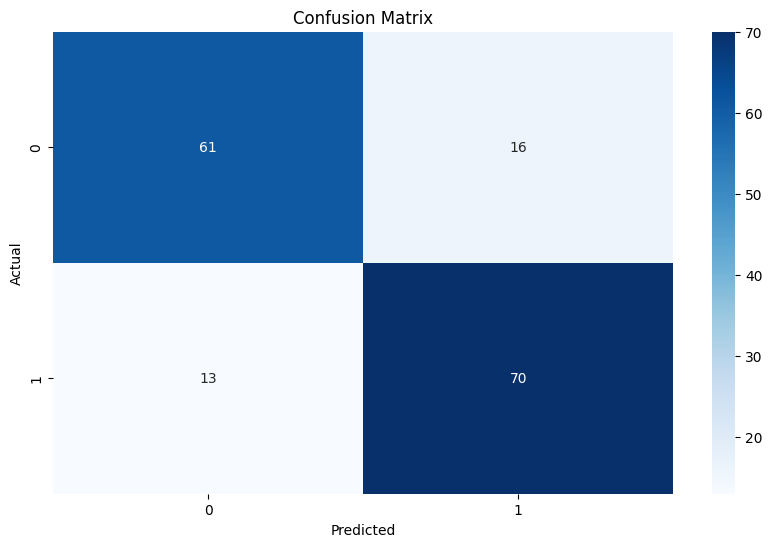

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.81      0.84      0.83        83

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



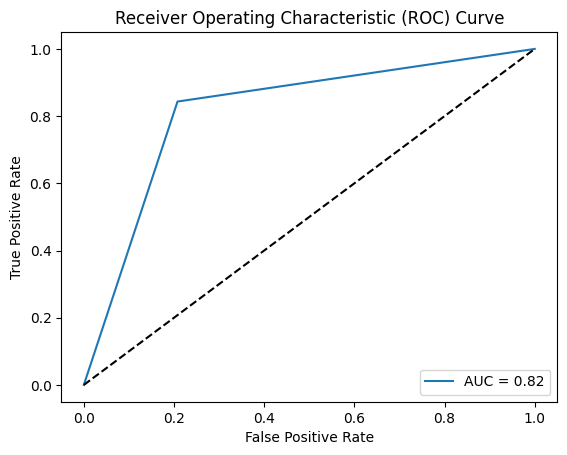

In [40]:
from sklearn.metrics import confusion_matrix,classification_report, roc_curve,roc_auc_score

# plot confusion matrix 
fig = plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal dotted line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Saving model

In [41]:
# Saving the model
import joblib
joblib.dump(best_classifier,'loan_model.pkl')

['loan_model.pkl']